GreyScale Image: 


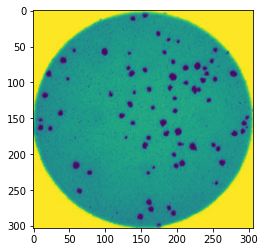

After filtering: 


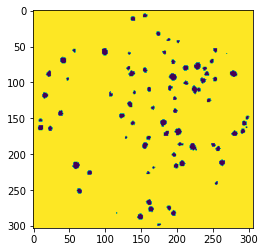

In [1]:
import numpy as np
import matplotlib.pylab as plt
from skimage import io

#Important variables
img="test1.jpg"          #file name
threshold=0.2            #threshold for making a pixel complete white
clny=2                   #minimum number of cluster in which colonies can get seperated
min_colonies=10
max_colonies=100

test = io.imread(img,as_gray = True)
print("GreyScale Image: ")
plt.imshow(test)
plt.show()
for i in range(len(test)):
    for j in range(len(test[i])):
        if(test[i][j]>=threshold): test[i][j]=1
        else:
            test[i][j]=0
print("After filtering: ")
plt.imshow(test)
plt.show()

In [2]:
test_flat = test.reshape(test.shape[0]*test.shape[1],1)
test_flat.shape

(92718, 1)

In [3]:
#clustering all colonies together and all non colonies together

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=clny, max_iter=10000,random_state = 10)
kmeans.fit(test_flat)
labels = kmeans.predict(test_flat)
print(len(labels))

92718


In [4]:
Ccentres = kmeans.cluster_centers_
test_new=[]
cluster1=[]
cluster2=[]
for i in range(len(labels)):
    test_new.append(Ccentres[labels[i]])
    if(labels[i]==0): cluster1.append(255)
    else: cluster1.append(0)
    if(labels[i]==1): cluster2.append(255)
    else: cluster2.append(0)
test_new=np.array(test_new)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)
test_new = test_new.reshape(test.shape[0],test.shape[1])
cluster1 = cluster1.reshape(test.shape[0],test.shape[1])
cluster2 = cluster2.reshape(test.shape[0],test.shape[1])

Cluster of everything except cell colonies: 


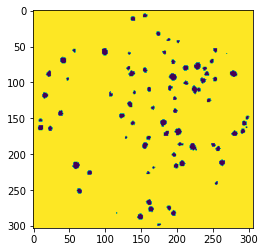

Cluster of cell colonies: 


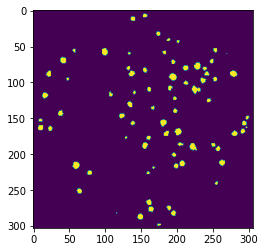

In [5]:
print("Cluster of everything except cell colonies: ")
plt.imshow(cluster1)
plt.show()
print("Cluster of cell colonies: ")
plt.imshow(cluster2)
plt.show()

In [ ]:
# Clustering on basis of distance on the cluster of colonies


newArray=[] #for distance based clustering
for i in range(len(cluster2)):
    for j in range(len(cluster2[i])):
        if(cluster2[i][j]==255): newArray.append([i,j])
newArray=np.array(newArray)


######### You will Have to wait for some time
#Deciding Optimal Number of CLusters:
print("Please wait...")
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
number_of_colonies=0
lowest_score=1e9
for k in range(min_colonies, max_colonies):
    kmeans = KMeans(n_clusters=k, max_iter=800,random_state=20111006).fit(newArray)
    labels=kmeans.predict(newArray)
    sse[k] = kmeans.inertia_ 
    db[k] = davies_bouldin_score(newArray,labels)
    if(lowest_score>db[k]):
        number_of_colonies=k
        lowest_score=db[k]
  
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

Please wait...


In [ ]:
kmeans = KMeans(n_clusters=number_of_colonies, max_iter=800,random_state = 20111006)
kmeans.fit(newArray)
labels = kmeans.predict(newArray)
print(labels.shape)

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread(img)
implot = plt.imshow(im)


plt.scatter(newArray[:,1],newArray[:,0],c=labels, cmap='nipy_spectral',s=2)
plt.show()
print("number of colonies: ",number_of_colonies)